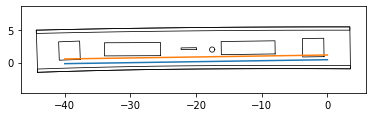

In [1]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number,get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

In [2]:
mean_distance = []
standard_deviation = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
#         df = get_whole_df(filename, 5, 5)
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        borderDistance = get_all_distances(df, inBorder = False)
        mean_distance.append(statistics.mean(borderDistance))
        standard_deviation.append(statistics.pstdev(borderDistance))

In [3]:
filenames = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
        filenames.append(filename)
filenames = [str(i[7:9]) + "." + str(i[5:7]) + ".2020" for i in filenames]

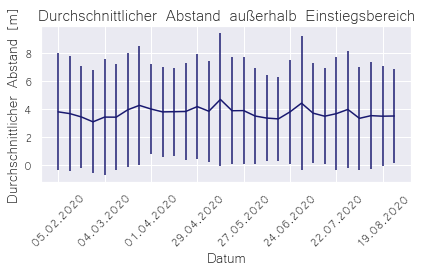

In [4]:
sb.set()
plt.errorbar(filenames, mean_distance, standard_deviation, color = "midnightblue")
plt.xticks(filenames, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durchschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.title("Durchschnittlicher Abstand außerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.savefig(r"Durchschnittlichen Abstände\Durchschnittabstand außerhalb Einstiegsbereich Standardabweichung", dpi = 200)

In [5]:
keep_distance_two_rolling = pd.Series(mean_distance).rolling(2).mean()
keep_distance_two_rolling

0          NaN
1     3.753488
2     3.570848
3     3.276341
4     3.271847
5     3.438572
6     3.699140
7     4.121431
8     4.150418
9     3.917448
10    3.820463
11    3.834816
12    4.016890
13    4.025641
14    4.282092
15    4.301585
16    3.903482
17    3.712663
18    3.444294
19    3.342161
20    3.561820
21    4.123736
22    4.080058
23    3.613704
24    3.595065
25    3.836978
26    3.670349
27    3.448254
28    3.524721
29    3.512758
dtype: float64

In [6]:
move = pd.DataFrame(index = filenames)
move["Durchschnittlicher Abstand"] = mean_distance
move["Gleitender Durchschnitt"] = list(keep_distance_two_rolling)

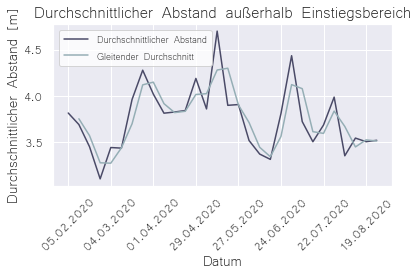

In [7]:
sb.lineplot(data = move, palette = "bone", sort = False, dashes = False, markers = False)
plt.xticks(filenames, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durchschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':12})
plt.title("Durchschnittlicher Abstand außerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.tight_layout()
plt.savefig(r"Durchschnittlichen Abstände\Durchschnittabstand außerhalb Einstiegsbereich gleitender Durchschnitt", dpi = 200)

In [8]:
move["Gleitender Durchschnitt"] = list(pd.Series(mean_distance).expanding().mean())

In [9]:
move.columns = ['Durchschnittlicher Abstand', 'Kumulierter gleitender Durchschnitt']

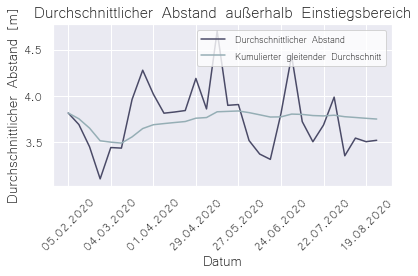

In [10]:
sb.lineplot(data = move, palette = "bone", sort = False, dashes = False, markers = False)
plt.xticks(filenames, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durchschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.legend(facecolor = "white", loc='upper right', prop={'family':"Microsoft Yi Baiti", 'size':12})
plt.title("Durchschnittlicher Abstand außerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.tight_layout()
plt.savefig(r"Durchschnittlichen Abstände\Durchschnittabstand außerhalb Einstiegsbereich kumulierter gleitender Durchschnitt", dpi = 200)